In [1]:
import pandas as pd
import numpy as np

<h4> 1. Load processed sets

In [2]:
#Load Test and validation sets from custom function
from src.data.sets import load_sets

In [3]:
X_train, X_val, y_train, y_val, X_test, X_test_ID = load_sets( )

<h4> 2. Import XGBoost

In [4]:
import xgboost as xgb

In [4]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=44)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=44)

In [5]:
#Save model in the models folder
from joblib import dump
dump(rf_model, '../models/random_forest_default.joblib')

['../models/random_forest_default.joblib']

In [6]:
y_trainpreds = rf_model.predict(X_train)
y_val_preds = rf_model.predict(X_val)

In [7]:
#Get error/score metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [8]:
print(mse(y_train, y_trainpreds, squared=False))
print(mae(y_train, y_trainpreds))

0.0
0.0


In [9]:
print(mse(y_val, y_val_preds, squared=False))
print(mae(y_val, y_val_preds))

0.5647560033674607
0.31894934333958724


In [10]:
rf_model.score(X_train, y_train)

1.0

In [11]:
rf_model.score(X_val, y_val)

0.6810506566604128

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

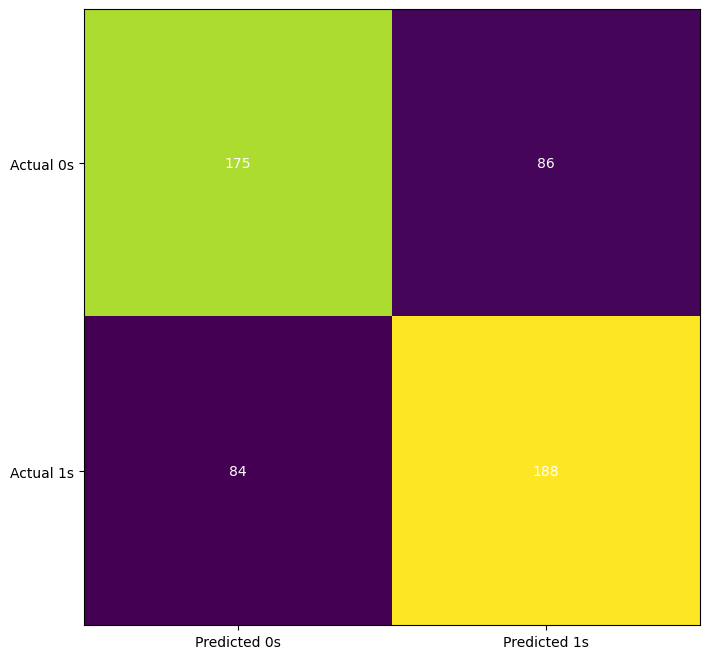

In [13]:
cm = confusion_matrix(y_val, y_val_preds)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [14]:
y_test_preds = rf_model.predict(X_test)

In [15]:
#Create Data Frame for Doc printing
df =pd.DataFrame()

In [16]:
df['Id'] = X_test_ID
df['TARGET_5Yrs'] = y_test_preds

In [17]:
df.head()

,Id,TARGET_5Yrs
0,0,0
1,1,0
2,2,1
3,3,1
4,4,0


In [18]:
#Saving predictions into csv
df.to_csv('../data/external/Kaggle_submission_random_forest.csv', index=False)